<a href="https://colab.research.google.com/github/vishwvir-singh/DeepLearningForNLP/blob/main/convolutional_sentiment_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
 
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, SpatialDropout1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding

from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [3]:
####Parameters

#Output Dir
output_dir = 'sentiment_classifier/conv'

#Training
epoch = 4
batch_size = 128

#vector space encoding
emb_dim = 64
n_unquie_num = 5000
max_sent_lenght = 400
pad_type = trunc_type = 'pre'
drop_emb = 0.2

# convolutional layer architecture:
n_conv = 256 # filters, a.k.a. kernels
k_conv = 3 # kernel length

# dense layer architecture: 
n_dense = 256
dropout = 0.2

In [13]:
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print("Folder created successfully !!!")
os.chdir(output_dir)
print('Path == {}  and ListDir == {}'.format(os.getcwd(),os.listdir()))

Path == /content/sentiment_classifier/conv/sentiment_classifier/conv  and ListDir == ['weights.04.hdf5', 'weights.01.hdf5', 'weights.02.hdf5', 'weights.03.hdf5']


In [5]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(
    num_words=n_unquie_num
)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [6]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [7]:
x_train = pad_sequences(x_train, maxlen=max_sent_lenght, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_sent_lenght, padding=pad_type, truncating=trunc_type, value=0)

In [8]:
print(x_train[0])
print(y_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4 

In [9]:
#Model Architecture

model = Sequential()
model.add(Embedding(input_dim=n_unquie_num, output_dim=emb_dim, input_length=max_sent_lenght))
model.add(SpatialDropout1D(drop_emb))

model.add(Conv1D(filters=n_conv, kernel_size=k_conv, activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(units=n_dense, activation='relu'))
model.add(Dropout(dropout))

model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 64)           320000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 400, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 398, 256)          49408     
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [10]:
model.compile(
    optimizer='nadam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [11]:
modelcheckpoint=ModelCheckpoint(filepath=output_dir+'/weights.{epoch:02d}.hdf5')

In [12]:
model.fit(x=x_train, y=y_train, 
          batch_size=batch_size, epochs=epoch, 
          validation_data=(x_valid, y_valid),
          callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 14s 30ms/step - loss: 0.5844 - accuracy: 0.6544 - val_loss: 0.2936 - val_accuracy: 0.8768
Epoch 2/4
196/196 [==============================] - 5s 28ms/step - loss: 0.2562 - accuracy: 0.8971 - val_loss: 0.2615 - val_accuracy: 0.8920
Epoch 3/4
196/196 [==============================] - 5s 28ms/step - loss: 0.1685 - accuracy: 0.9373 - val_loss: 0.2578 - val_accuracy: 0.8948
Epoch 4/4
196/196 [==============================] - 5s 28ms/step - loss: 0.1186 - accuracy: 0.9612 - val_loss: 0.3141 - val_accuracy: 0.8820


In [17]:
model.load_weights('weights.03.hdf5')

In [18]:
y_hat = model.predict(x=x_valid)

In [19]:
y_hat[:6]

array([[0.02700891],
       [0.9975776 ],
       [0.946183  ],
       [0.52617574],
       [0.98977846],
       [0.64937943]], dtype=float32)

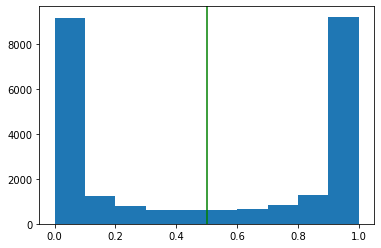

In [21]:
plt.hist(x=y_hat)
_ = plt.axvline(x=0.5, color='green')

In [27]:
percent_roc = roc_auc_score(y_true=y_valid, y_score=y_hat)*100.0

In [28]:
print('{}%'.format(percent_roc))

96.05923936%
